In [1]:
library(dplyr)
library(arrow)
library(ggplot2)
library(xml2)
library(ggsoccer)


Attaching package: ‘dplyr’

The following objects are masked from ‘package:stats’:

    filter, lag

The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union


Attaching package: ‘arrow’

The following object is masked from ‘package:utils’:

    timestamp



In [2]:
frames <- read_parquet("/home/lz80/rdf/sp161/shared/soccer-decision-making-r/sportec/passes.parquet")


In [3]:
pitch_sportec <- list(
  length = 105,
  width = 68,
  penalty_box_length = 16.5,
  penalty_box_width = 40.32,
  six_yard_box_length = 5.5,
  six_yard_box_width = 18.32,
  penalty_spot_distance = 11,
  goal_width = 7.32,
  origin_x = -52.5,
  origin_y = -34
)


In [4]:
a <- frames |>
  filter(result == "OUT") |>
  distinct(event_id) |>
  pull(event_id) |>
  nth(1)
a

integer64
[1] 18477700000007

In [9]:
t_play <- frames |> filter(event_id == a)

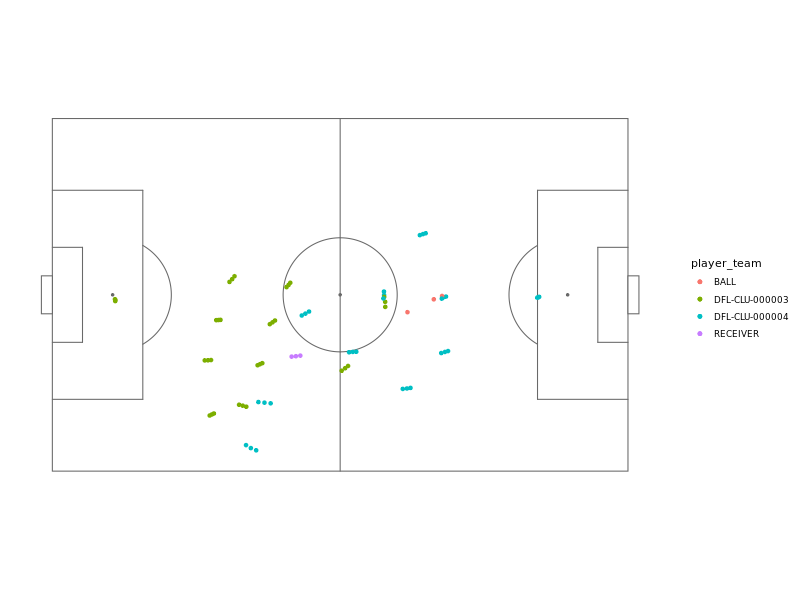

In [10]:
t_play |> mutate(
  player_team = ifelse(is_intended, "RECEIVER", player_team))  |> ggplot() + annotate_pitch(dimension = pitch_sportec) + geom_point( aes(x = x, y = y, col = player_team)) + theme_pitch() + geom_point( aes(x = x_m5, y = y_m5, col = player_team)) + geom_point( aes(x = x_p5, y = y_p5, col = player_team))

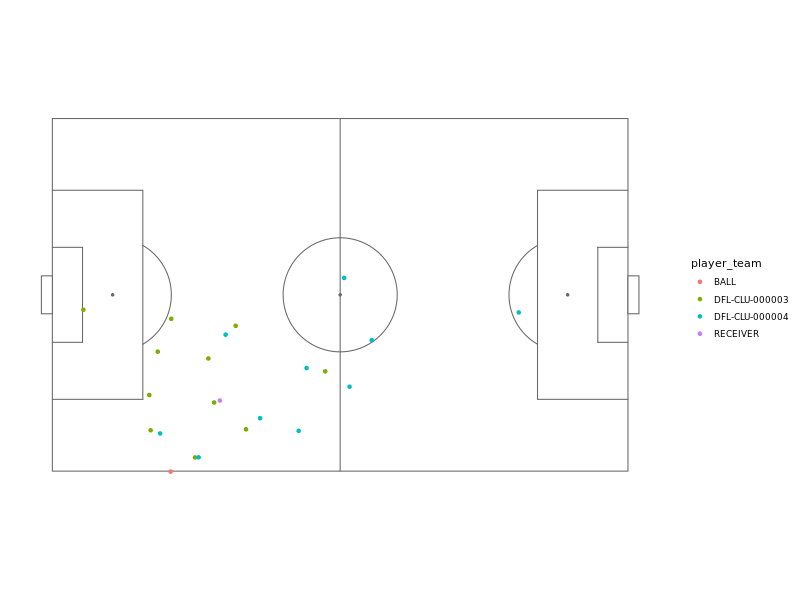

In [12]:
t_play |> mutate(
  player_team = ifelse(is_intended, "RECEIVER", player_team)) |>  ggplot() + annotate_pitch(dimension = pitch_sportec) + geom_point(aes(x = x_rec, y = y_rec, col = player_team)) +  theme_pitch() 